# 2. Machine learning for regression

In [2]:
import pandas as pd
import numpy as np

## 2.1 Data preparation

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
df = pd.read_csv(data)

In [15]:
df.head() # muestra los 10 primeros

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
df.tail() # muestra los 10 ultimos

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
# colocamos las letras en minusculas y los espacios los llenamos con _
df.columns = df.columns.str.lower().str.replace(' ','_') 

In [6]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [25]:
# tipo de variable o caracterica
df.dtypes 

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
# obtener el booliano de cada variable
df.dtypes =='object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [8]:
# Se escogen las variables que sin objeto o caracteristica
# la primera columna son los indices
# la segunda columna son los valores
df.dtypes[df.dtypes =='object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [9]:
# se obtiene una lista de las variables categoricas
strings = list(df.dtypes[df.dtypes =='object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for col in strings:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.2 Exploratory data analysis (EDA)

In [12]:
# para conocer los datos de las variables y el tipo de variable
for col in df.columns:
    print(col)
    #print(df[col].head(3))
    print(df[col].unique()[:5])   # los datos unicos
    print(df[col].nunique())      # cantidad de datos unicos por variable
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [13]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Distribution of price

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

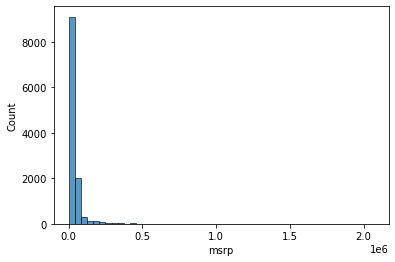

In [44]:
# graficas del precio
sns.histplot(df.msrp,bins=50)

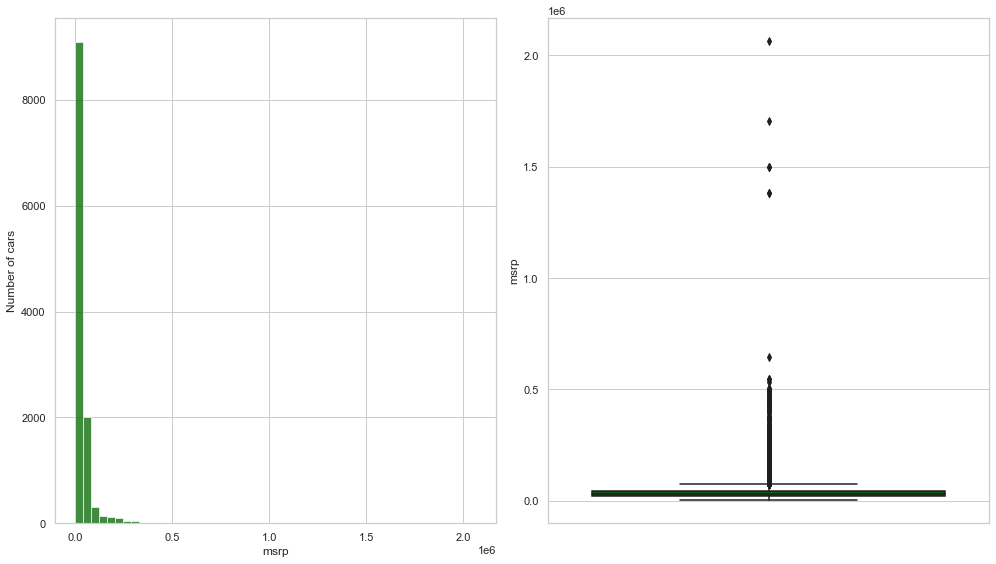

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(14,8))

plt.subplot(121)
sns.histplot(data= df, x = 'msrp',bins=50,color="darkgreen") # histogram
plt.ylabel('Number of cars')

plt.subplot(122)
sns.boxplot(data=df, y='msrp',color="darkgreen" ) # boxplot

plt.tight_layout()

Se puede observar que el precio de los carros, la mayor cantidad se ha vendido mas barato que con respecto a otros carros que sean vendido caros, pero muy pocos.

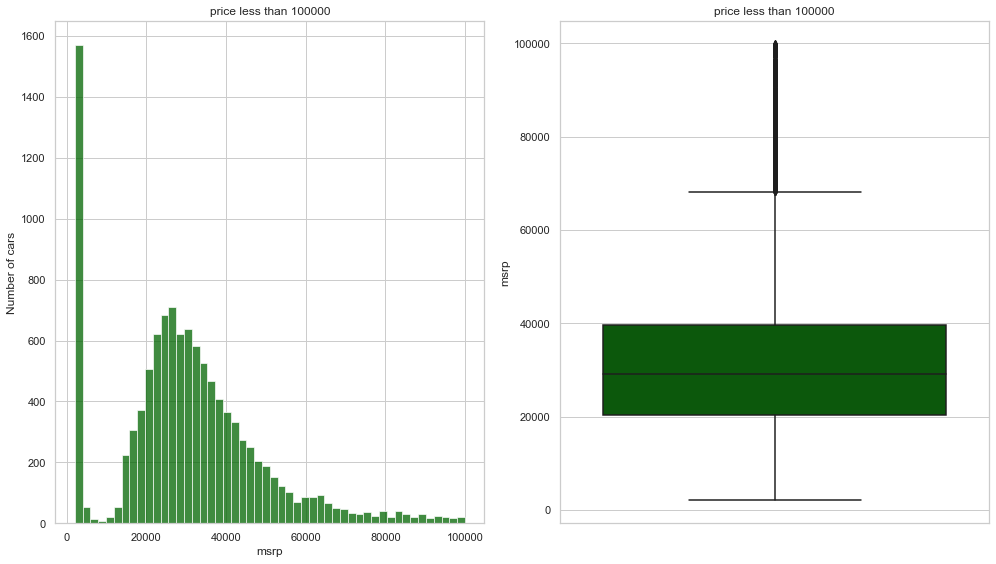

In [28]:
# hagamos la grafica para el precio menor que 100000
sns.set(style="whitegrid")

plt.figure(figsize=(14,8))

plt.subplot(121)
sns.histplot(data = df[df['msrp'] < 100000], x = 'msrp',bins=50,color="darkgreen") # histogram
plt.ylabel('Number of cars')
plt.title('price less than 100000')

plt.subplot(122)
sns.boxplot(data = df[df['msrp'] < 100000], y='msrp',color="darkgreen" ) # boxplot
plt.title('price less than 100000')
 
plt.tight_layout()

Podemos ver que hay un pico extraño de autos con el precio de apoximadamente de $\$1000$. Además, tenemos aproximadamente $\$800$ carrros vendidos por $\$25000$. Es claro que para la realización del modelo presentamos problemasen para la cola hacia la derecha, por lo que usaremos logaritmo.

In [32]:
df['prices_log'] = np.log1p(df.msrp)

In [36]:
df['prices_log'].head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,prices_log
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,10.448744


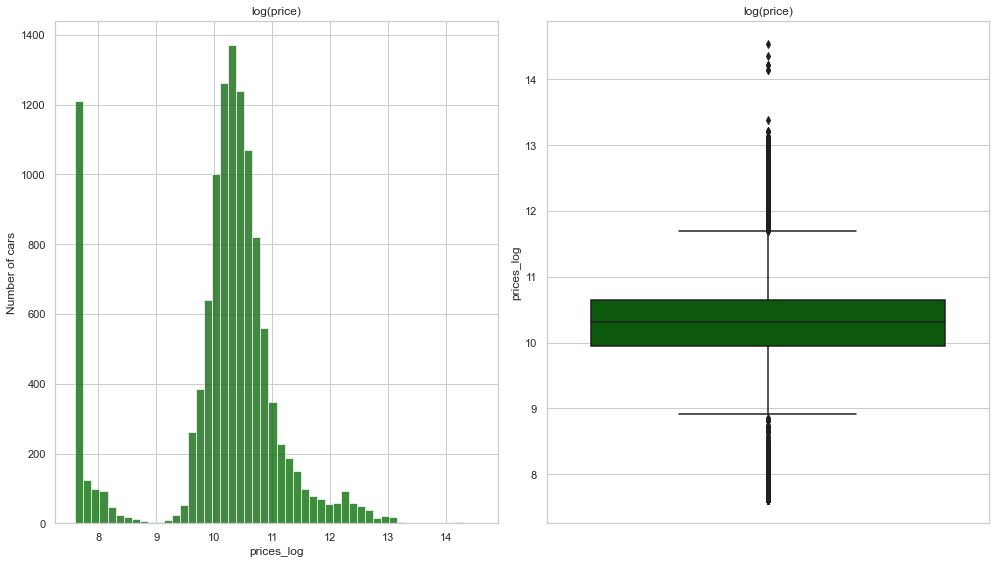

In [38]:
# hagamos la grafica para el logaritmo del precio menor que 100000
sns.set(style="whitegrid")

plt.figure(figsize=(14,8))

plt.subplot(121)
sns.histplot(data = df, x = 'prices_log',bins=50,color="darkgreen") # histogram
plt.ylabel('Number of cars')
plt.title('log(price)')

plt.subplot(122)
sns.boxplot(data = df, y='prices_log',color="darkgreen" ) # boxplot
plt.title('log(price)')
 
plt.tight_layout()

La cola a la derecha se ha ido. Al parecer los datos tienen comportamiento de una distribución normal, si no tenemos en cuenta el pico al lado izquierdo. 

## Missing values

In [40]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
prices_log              0
dtype: int64

<AxesSubplot:>

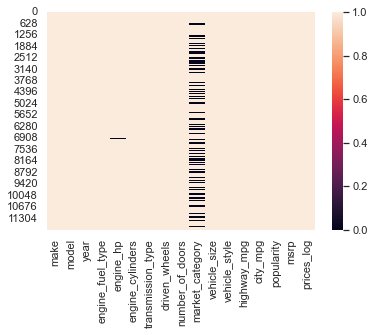

In [42]:
# graficar valores faltantes
sns.heatmap(df.notna())

## 2.3 Setting up the validation framework

Let's draw it

In [45]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val -n_test 

In [46]:
n, n_val + n_test + n_train

(11914, 11914)

In [47]:
n_val , n_test , n_train

(2382, 2382, 7150)

In [48]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [85]:
np.random.seed(1) # a seed makes the analysis reproducible
                  # so everyone will get the same results
n = len(df)
# Randomly choose 0.6n indices between 1 and n
idx_train = np.random.choice(range(n),int(0.6*n),replace=False)

# rest of index
n_val_test = n - len(idx_train)
rest_idx = np.asarray(list(set(range(n)) - set(idx_train)))

# The test and valitation sets, not selected in the training set:
idx_test = np.random.choice(rest_idx,int(0.5*n_val_test),replace=False)
idx_val  = np.asarray(list(set(rest_idx) - set(idx_test)))

# selection train, validation and test datas
df_train = df.iloc[idx_train] # the training data set
df_val = df.iloc[idx_val]  # the val data set
df_test = df.iloc[idx_test]  # the test data set

# shape
print(df_train.shape) 
print(df_val.shape)
print(df_test.shape) 

(7148, 17)
(2383, 17)
(2383, 17)


In [84]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,prices_log
7207,volkswagen,new_beetle,2009,regular_unleaded,150.0,5.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,28,20,873,18290,9.814164
3549,aston_martin,dbs,2012,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,12,259,290861,12.580604
6152,volkswagen,jetta,2017,regular_unleaded,150.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,40,28,873,17895,9.792333
2738,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,33,24,1385,14410,9.575747
7797,infiniti,q50,2017,premium_unleaded_(recommended),360.0,6.0,automatic,all_wheel_drive,4.0,"luxury,high-performance,hybrid",compact,sedan,30,26,190,49800,10.815790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,honda,accord,2016,regular_unleaded,185.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,37,27,2202,26380,10.180399
5528,suzuki,grand_vitara,2013,regular_unleaded,166.0,4.0,automatic,rear_wheel_drive,4.0,crossover,compact,4dr_suv,25,19,481,24449,10.104385
499,toyota,4runner,2016,regular_unleaded,270.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,21,17,2031,41850,10.641871
8804,gmc,s-15,1990,regular_unleaded,105.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,regular_cab_pickup,25,21,549,2000,7.601402
